In [1]:
import time
import bisect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages

“Please note that  the submission is an ipython notebook with explanations in markdown. Please save images of the graphs you output and include in your submission a zipped folder with the jupyter notebook and images. This is because the graphs output by the notebook will differ depending on the machine, OS etc, and we may not see the same image you do when we run the notebook to grade. You only need to add "plt.savefig('file_nameXX.png')" at the end of the cell where you plot.”

In [2]:
test_list_i = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,101,102,103,104,105,106,107,108,109,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,201,202,203,204,205,206,207,208,209,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300,301,302,303,304,305,306,307,308,309,310,315,320,325,330,335,340,345,350,355,360,365,370,375,380,385,390,395,400,401,402,403,404,405,406,407,408,409,410,415,420,425,430,435,440,445,450,455,460,465,470,475,480,485,490,495,500,501,502,503,504,505,506,507,508,509,510,515,520,525,530,535,540,545,550,555,560,565,570,575,580,585,590,595,600,601,602,603,604,605,606,607,608,609,610,615,620,625,630,635,640,645,650,655,660,665,670,675,680,685,690,695,700,701,702,703,704,705,706,707,708,709,710,715,720,725,730,735,740,745,750,755,760,765,770,775,780,785,790,795,800,801,802,803,804,805,806,807,808,809,810,815,820,825,830,835,840,845,850,855,860,865,870,875,880,885,890,900,901,902,903,904,905,906,907,908,909,910,915,920,925,930,935,940,945,950,955,960,965,970,975,980,985,990,995,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600]
test_list_r = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,101,102,103,104,105,106,107,108,109,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,201,202,203,204,205,206,207,208,209,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300,301,302,303,304,305,306,307,308,309,310,315,320,325,330,335,340,345,350,355,360,365,370,375,380,385,390,395,400,401,402,403,404,405,406,407,408,409,410,415,420,425,430,435,440,445,450,455,460,465,470,475,480,485,490,495,500,501,502,503,504,505,506,507,508,509,510,515,520,525,530,535,540,545,550,555,560,565,570,575,580,585,590,595,600,601,602,603,604,605,606,607,608,609,610,615,620,625,630,635,640,645,650,655,660,665,670,675,680,685,690,695,700,701,702,703,704,705,706,707,708,709,710,715,720,725,730,735,740,745,750,755,760,765,770,775,780,785,790,795,800,801,802,803,804,805,806,807,808,809,810,815,820,825,830,835,840,845,850,855,860,865,870,875,880,885,890,900,901,902,903,904,905,906,907,908,909,910,915,920,925,930,935,940,945,950,955,960,965,970,975,980,985,990,995,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600]

In [3]:
numOfIterations = 10

## Iterative Factorial Function


In [4]:
def fact_i(x):
    tic = time.perf_counter_ns()
    i = 1
    fact = 1
    while i <= x:
        fact *= i
        i += 1
    toc = time.perf_counter_ns()
    seconds = toc - tic
    
    return [fact, seconds]

In [5]:
j = 0
timeTakenLists_i = []
while j < numOfIterations:
    factResults_i = []
    timeTaken_i = []
    for i in test_list_i:
        temp = fact_i(i)
        factResults_i.append(temp[0])
        timeTaken_i.append(round(temp[1],4))
    timeTakenLists_i.append(timeTaken_i)
    j += 1

In [6]:
timePerFact_i = []
for l in range(len(timeTakenLists_i[0])):
    timePerFact_i.append([])
    for k in range(len(timeTakenLists_i)):
        timePerFact_i[l].append(timeTakenLists_i[k][l])

In [7]:
timeAverages_i = []
for m in range(len(timePerFact_i)):
    timeSum_i = sum(timePerFact_i[m])
    timeAverages_i.append(timeSum_i / len(timePerFact_i[0]))

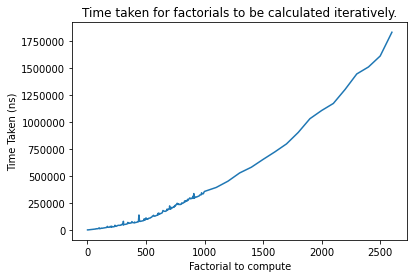

In [8]:
plt.plot(test_list_i,timeAverages_i)
plt.ticklabel_format(style='plain')
plt.xlabel('Factorial to compute')
plt.ylabel('Time Taken (ns)')
plt.title('Time taken for factorials to be calculated iteratively.')
plt.show()

### Discussion of iterative function results

As expected the time taken to solve a factorial iteratively grows based on the size of the factorial being calculated. A reduction in the noisyness of the graph is created by getting the average of the times over a number of iterations. This function would have a O(n) due to the while loop iterating through the multplications.

## Recursive Factorial Function


In [9]:
def fact_r(n):
    """Function to return the factorial of a number using recursion"""
    tic = time.perf_counter_ns()
    if n == 0:
        factorials = 1
    else:
        factorials = n * fact_r(n-1)
    toc = time.perf_counter_ns()
    timeTaken = toc - tic
    
    return [factorials, timeTaken]

In [10]:
x = 0
timeTakenLists_r = []
while x < numOfIterations:
    factResults_r = []
    timeTaken_r = []
    for i in test_list_r:
        temp = fact_r(i)
        factResults_r.append(temp[0])
        timeTaken_r.append(temp[1])
    timeTakenLists_r.append(timeTaken_r)
    x += 1

In [11]:
timePerFact_r = []
for l in range(len(timeTakenLists_r[0])):
    timePerFact_r.append([])
    for k in range(len(timeTakenLists_r)):
        timePerFact_r[l].append(timeTakenLists_r[k][l])

In [12]:
timeAverages_r = []
for m in range(len(timePerFact_r)):
    timeSum_r = sum(timePerFact_r[m])
    timeAverages_r.append(timeSum_r / len(timePerFact_r[0]))

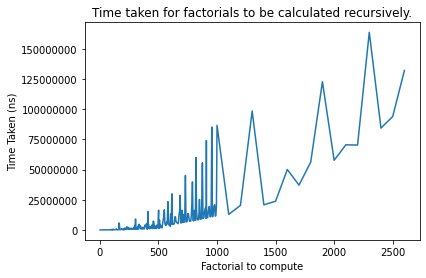

In [13]:
plt.plot(test_list_r, timeAverages_r)
plt.ticklabel_format(style='plain')
plt.xlabel('Factorial to compute')
plt.ylabel('Time Taken (ns)')
plt.title('Time taken for factorials to be calculated recursively.')
plt.show()

### Discussion for recursive factorial results

The non-tail recursive function shows a different story. It is both slower and less powerful than the iterative function. During testing it was determined that the recursive function could calculate the factorial of 2500 before stack over flow, however, it could not do 3000. Again the notation seems to be O(n) and yet it is quite a bit slower than the iterative function. During testing it was discovered that the time taken to calculate the factorial is not consistent. It is noted that some of this can be due to the processer working, however, the results did not smooth out with averaging of the times like the iterative function.

# Searching

Note due to the larger integers being caluclated, a slice of the original factorial results was taken for searching analysis. A Slice between index 0 and 45 was taken to allow the curve-fit program to work.

In [82]:
sequence = factResults_i[:46]

## Linear Search


Compare pythons inbuilt index feature with my linear search function

Using the answers sequence from the iterative and recursive functions in order to keep a consistent sequence. Due to fluxuations in times due to the work the CPU is completing at the same time, the time sequences may not be exact.



In [16]:
bestCase_lin = sequence[0]
worstCase_lin = sequence[-1]
missingCase_lin = -1

### Python's .index() method


In [17]:
timeTakenBCIn = []
i = 0
while i < numOfIterations:
    tic = time.perf_counter_ns()
    bestCaseIndex = sequence.index(bestCase_lin)
    toc = time.perf_counter_ns()
    timeTakenBCIn.append(toc - tic)
    i += 1

In [18]:
timeTakenBCInAvg = sum(timeTakenBCIn) / len(timeTakenBCIn)

In [19]:
timeTakenWCIn = []
i = 0
while i < numOfIterations:
    tic = time.perf_counter_ns()
    worstCaseIndex = sequence.index(worstCase_lin)
    toc = time.perf_counter_ns()
    timeTakenWCIn.append(toc - tic)
    i += 1

In [20]:
timeTakenWCInAvg = sum(timeTakenWCIn) / len(timeTakenWCIn)

In [21]:
timeTakenMCIn = []
i = 0
while i < numOfIterations:
    tic = time.perf_counter_ns()
    try:
        Index = sequence.index(missingCase_lin)
    except:
        error = "error"
    toc = time.perf_counter_ns()
    timeTakenMCIn.append(toc - tic)
    i += 1

In [22]:
timeTakenMCInAvg = sum(timeTakenMCIn) / len(timeTakenMCIn)

In [23]:
timeTakenListIn = [timeTakenBCInAvg, timeTakenMCInAvg, timeTakenWCInAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

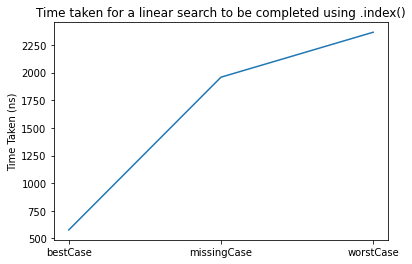

In [84]:
plt.plot(casesListIn, timeTakenListIn)
plt.ylabel('Time Taken (ns)')
plt.title('Time taken for a linear search to be completed using .index()')
plt.show()

In this case the worstcase value is in the list where as its quicker to calculate the missing number

### Linear Search Function

In [25]:
def linearSearch(array, x):
    error = 0
    try:
        for i in range(len(array)):
            if (array[i] == x):
                return i
    except:
        error = "error"
        return error

In [26]:
timeTakenListBL = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    bestLinear = linearSearch(sequence, bestCase_lin)
    toc = time.perf_counter_ns()
    timeTakenListBL.append(toc - tic)
    y += 1

In [27]:
timeTakenBLAvg = sum(timeTakenListBL) / len(timeTakenListBL)

In [28]:
timeTakenListWL = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    worstLinear = linearSearch(sequence, worstCase_lin)
    toc = time.perf_counter_ns()
    timeTakenListWL.append(toc - tic)
    y += 1

In [29]:
timeTakenWLAvg = sum(timeTakenListWL) / len(timeTakenListWL)

In [30]:
timeTakenListML = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    missingLinear = linearSearch(sequence, missingCase_lin)
    toc = time.perf_counter_ns()
    timeTakenListML.append(toc - tic)
    y += 1
print(timeTakenListML)

[15677, 7863, 6405, 6198, 6203, 5819, 5881, 5691, 5701, 5698]


In [31]:
timeTakenMLAvg = sum(timeTakenListML) / len(timeTakenListML)

In [32]:
timeTakenListLin = [timeTakenBLAvg, timeTakenMLAvg, timeTakenWLAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

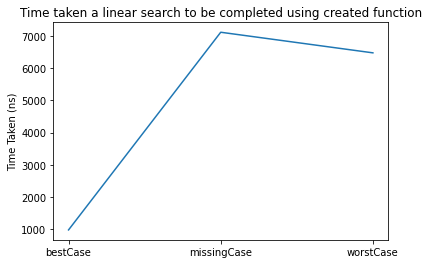

In [85]:
plt.plot(casesListIn, timeTakenListLin)
plt.ylabel('Time Taken (ns)')
plt.title('Time taken a linear search to be completed using created function')
plt.show()

Unlike the index method, the missingcase takes longer than the worst case. This could be down to how the index method searches the list for the value, or it could be down to processor speed. During he testing the missing and worst case would alternate between which had the longer time.

## Binary Search using bisect() method


In [34]:
halfway = (0 + (len(sequence)-1)) // 2
print(halfway)
bestCase_b = sequence[halfway]
worstCase_b = sequence[-1]
missingCase_b = -1

22


In [35]:
def bisectSearch(array, value):
    try:
        i = bisect.bisect_left(array, value)
        if i < len(array) and array[i] == value:
            return i
    except:
        return "error"

In [36]:
timeTakenListBB = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    bestBinary = bisectSearch(sequence, bestCase_b)
    toc = time.perf_counter_ns()
    timeTakenListBB.append(toc - tic)
    y += 1
print(bestBinary)

22


In [37]:
timeTakenBBAvg = sum(timeTakenListBB) / len(timeTakenListBB)

In [38]:
timeTakenListWB = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    worstBinary = bisectSearch(sequence, worstCase_b)
    toc = time.perf_counter_ns()
    timeTakenListWB.append(toc - tic)
    y += 1

In [39]:
timeTakenWBAvg = sum(timeTakenListWB) / len(timeTakenListWB)

In [40]:
timeTakenListMB = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    missingBinary = bisectSearch(sequence, missingCase_b)
    toc = time.perf_counter_ns()
    timeTakenListMB.append(toc - tic)
    y += 1

In [41]:
timeTakenMBAvg = sum(timeTakenListMB) / len(timeTakenListMB)

In [42]:
timeTakenListBis = [timeTakenBBAvg, timeTakenMBAvg, timeTakenWBAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

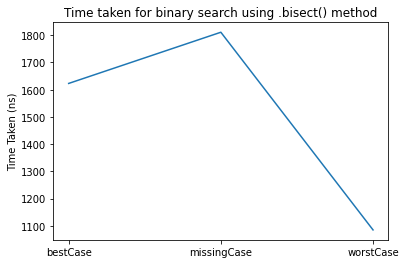

In [86]:
plt.plot(casesListIn, timeTakenListBis)
plt.ylabel('Time Taken (ns)')
plt.title('Time taken for binary search using .bisect() method')
plt.show()

## Binary Search Iteratively

In [44]:
def binarySearchIterative(array, value):
    try:
        beginning = 0
        end = (len(array)-1)
        center = (beginning + end) // 2

        if array[center] == value:
                return center
            
        while beginning <= end:
            center = (beginning + end) // 2
            
            if array[center] == value:
                return center
            
            if array[center] < value:
                beginning = center + 1
            elif array[center] > value:
                end = center - 1
    except:
        return "error"
        

In [45]:
timeTakenListBBI = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    bestBinary = binarySearchIterative(sequence, bestCase_b)
    toc = time.perf_counter_ns()
    timeTakenListBBI.append(toc - tic)
    y += 1
print(bestBinary)

22


In [46]:
timeTakenBBIAvg = sum(timeTakenListBBI) / len(timeTakenListBBI)

In [47]:
timeTakenListWBI = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    worstBinary = binarySearchIterative(sequence, worstCase_b)
    toc = time.perf_counter_ns()
    timeTakenListWBI.append(toc - tic)
    y += 1

In [48]:
timeTakenWBIAvg = sum(timeTakenListWBI) / len(timeTakenListWBI)

In [49]:
timeTakenListMBI = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    missingBinary = binarySearchIterative(sequence, missingCase_b)
    toc = time.perf_counter_ns()
    timeTakenListMBI.append(toc - tic)
    y += 1

In [50]:
timeTakenMBIAvg = sum(timeTakenListMBI) / len(timeTakenListMBI)

In [51]:
timeTakenListBin = [timeTakenBBIAvg, timeTakenMBIAvg, timeTakenWBIAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

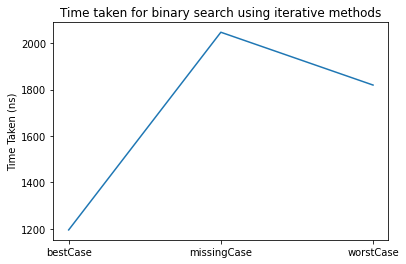

In [87]:
plt.plot(casesListIn, timeTakenListBin)
plt.ylabel('Time Taken (ns)')
plt.title('Time taken for binary search using iterative methods')
plt.show()

## Binary Search Recursive Function

In [53]:
def binarySearchRecursive(array, value):
    def search(beginning, end):
        if beginning <= end:
            center = (beginning + end) // 2
            if array[center] == value:
                return True
            elif array[center] < value:
                return search(center + 1, end)
            elif array[center] > value:
                return search(beginning, center - 1)
        return False
    return search(0, len(array) - 1)

In [54]:
timeTakenListBBR = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    bestBinary = binarySearchRecursive(sequence, bestCase_b)
    toc = time.perf_counter_ns()
    timeTakenListBBR.append(toc - tic)
    y += 1
print(bestBinary)

True


In [55]:
timeTakenBBRAvg = sum(timeTakenListBBR) / len(timeTakenListBBR)

In [56]:
timeTakenListWBR = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    bestBinary = binarySearchRecursive(sequence, bestCase_b)
    toc = time.perf_counter_ns()
    timeTakenListWBR.append(toc - tic)
    y += 1
print(bestBinary)

True


In [57]:
timeTakenWBRAvg = sum(timeTakenListWBR) / len(timeTakenListWBR)

In [58]:
timeTakenListMBR = []
y = 0
while y < numOfIterations:
    tic = time.perf_counter_ns()
    bestBinary = binarySearchRecursive(sequence, bestCase_b)
    toc = time.perf_counter_ns()
    timeTakenListMBR.append(toc - tic)
    y += 1
print(bestBinary)

True


In [59]:
timeTakenMBRAvg = sum(timeTakenListMBR) / len(timeTakenListMBR)

In [60]:
timeTakenListBinR = [timeTakenBBRAvg, timeTakenMBRAvg, timeTakenWBRAvg]
casesListIn = ["bestCase", "missingCase", "worstCase"]

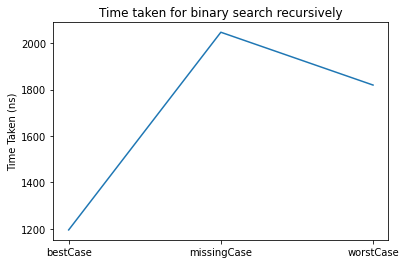

In [88]:
plt.plot(casesListIn, timeTakenListBin)
plt.ylabel('Time Taken (ns)')
plt.title('Time taken for binary search recursively')
plt.show()

Binary Searches

The Binary searches showed similar results to the linear search with the missing case being the worst time sink. However, the Bisect method took a particularly long time to find the best case value and a very quick time to find the supposedly worst case value. This may be due to the bisect() method searching the list differently to binary search.

## Curve Fit algorithms


### Factorial computations - Iterative

In [62]:
test_lol_i = []
for i in range(numOfIterations):
    test_lol_i += test_list_i
test_lol_i.sort()

Create two lists with the factorials in one list repeated and one long list of the time takens repeating in the same order as the factorials.


In [63]:
timeTaken_i = []
for i in timePerFact_i:
    for j in i:
        timeTaken_i.append(j)

In [64]:
test_list_i_array = np.array(test_list_i)
x_axis_train_i = test_list_i_array.reshape(-1, 1)
timeTakenList_i_array = np.array(timeTakenLists_i[0])
y_axis_train_i = timeTakenList_i_array.reshape(-1, 1)

Coefficients: [[551.28074572]]
Mean squared error: 7876295114.18
Coefficient of determination: 0.88


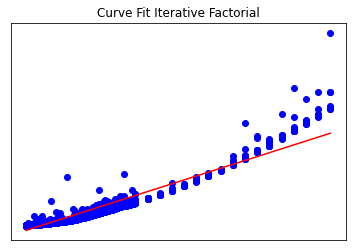

In [89]:
test_lol_i_array = np.array(test_lol_i)
timeTaken_i_array = np.array(timeTaken_i)
x_axis_test_i = (test_lol_i_array[len(test_list_i):]).reshape(-1, 1)
y_axis_test_i = (timeTaken_i_array[len(test_list_i):]).reshape(-1, 1)

regr_i = linear_model.LinearRegression()

regr_i.fit(x_axis_train_i, y_axis_train_i)

y_pred_i = regr_i.predict(x_axis_test_i)

print('Coefficients:', regr_i.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_axis_test_i, y_pred_i))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_axis_test_i, y_pred_i))

plt.scatter(x_axis_test_i, y_axis_test_i, color='blue')
plt.plot(x_axis_test_i, y_pred_i, color='red')

plt.xticks(())
plt.yticks(())
plt.title('Curve Fit Iterative Factorial')
plt.show()


### Factorial Computations - Recursive

In [66]:
test_lol_r = []
for i in range(numOfIterations):
    test_lol_r += test_list_r
test_lol_r.sort()

In [67]:
timeTaken_r = []
for i in timePerFact_r:
    for j in i:
        timeTaken_r.append(j)

In [68]:
test_list_r_array = np.array(test_list_r)
x_axis_train_r = test_list_r_array.reshape(-1, 1)
timeTakenList_r_array = np.array(timeTakenLists_r[0])
y_axis_train_r = timeTakenList_r_array.reshape(-1, 1)

Coefficients: [[34042.78578388]]
Mean squared error: 1438733861452928.25
Coefficient of determination: 0.16


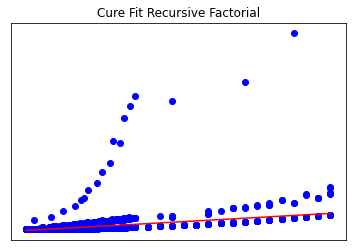

In [90]:
test_lol_r_array = np.array(test_lol_r)
timeTaken_r_array = np.array(timeTaken_r)
x_axis_test_r = (test_lol_r_array[len(test_list_r):]).reshape(-1, 1)
y_axis_test_r = (timeTaken_r_array[len(test_list_r):]).reshape(-1, 1)

regr_r = linear_model.LinearRegression()

regr_r.fit(x_axis_train_r, y_axis_train_r)

y_pred_r = regr_r.predict(x_axis_test_r)

print('Coefficients:', regr_r.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_axis_test_r, y_pred_r))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_axis_test_r, y_pred_r))

plt.scatter(x_axis_test_r, y_axis_test_r, color='blue')
plt.plot(x_axis_test_r, y_pred_r, color='red')

plt.xticks(())
plt.yticks(())
plt.title('Cure Fit Recursive Factorial')
plt.show()


### Linear Search

In [70]:
test_cases_l = [bestCase_lin, worstCase_lin, missingCase_lin]

In [71]:
test_loc_l = []
for i in range(numOfIterations - 1):
    test_loc_l += test_cases_l
test_loc_l.sort()
print(len(test_loc_l))

27


In [72]:
timeTaken_linear = [timeTakenListBL,timeTakenListWL,timeTakenListML]
timeTaken_l = []
for i in timeTaken_linear:
    for j in i:
        timeTaken_l.append(j)

In [73]:
test_cases_l_array = np.array(test_cases_l)
x_axis_train_l = test_cases_l_array.reshape(-1, 1)

timeTaken_l_array = np.array([timeTakenListBL[0],timeTakenListWL[0],timeTakenListML[0]])
y_axis_train_l = timeTaken_l_array.reshape(-1, 1)


In [74]:
timeTakenListBL_test = timeTakenListBL.copy()
del timeTakenListBL_test[0]
timeTakenListWL_test = timeTakenListWL.copy()
del timeTakenListWL_test[0]
timeTakenListML_test = timeTakenListML.copy()
del timeTakenListML_test[0]
timeTaken_test_l = [timeTakenListBL_test,timeTakenListWL_test,timeTakenListML_test]

Coefficients: [[5.84679767e-260]]
Mean squared error: 46320536.69
Coefficient of determination: -6.27


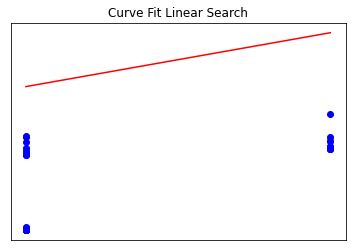

In [91]:
test_loc_l_array = np.array(test_loc_l)
timeTaken_test_l_array = np.array(timeTaken_test_l)
x_axis_test_l = (test_loc_l_array).reshape(-1, 1)
y_axis_test_l = (timeTaken_test_l_array).reshape(-1, 1)

regr_l = linear_model.LinearRegression()

regr_l.fit(x_axis_train_l, y_axis_train_l)

y_pred_l = regr_l.predict(x_axis_test_l)

print('Coefficients:', regr_l.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_axis_test_l, y_pred_l))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_axis_test_l, y_pred_l))

plt.scatter(x_axis_test_l, y_axis_test_l, color='blue')
plt.plot(x_axis_test_l, y_pred_l, color='red')

plt.xticks(())
plt.yticks(())
plt.title('Curve Fit Linear Search')
plt.show()


### Binary Search

In [76]:
test_cases_b = [bestCase_b, worstCase_b]

In [77]:
test_loc_b = []
for i in range(numOfIterations - 1):
    test_loc_b += test_cases_b
test_loc_b.sort()
print(len(test_loc_b))

18


In [78]:
timeTaken_binary = [timeTakenListBB,timeTakenListWB]
timeTaken_b = []
for i in timeTaken_binary:
    for j in i:
        timeTaken_b.append(j)

In [79]:
test_cases_b_array = np.array(test_cases_b)
x_axis_train_b = test_cases_b_array.reshape(-1, 1)
print(x_axis_train_b)
timeTaken_b_array = np.array([timeTakenListBB[0],timeTakenListWB[0]])
y_axis_train_b = timeTaken_b_array.reshape(-1, 1)
print(y_axis_train_b)

[[24809140811395398091946477116594033660926243886570122837795894512655842677572867409443815424000000000000000000]
 [57133839564458545904789328652610540031895535786011264182548375833179829124845398393126574488675311145377107878746854204162666250198684504466355949195922066574942592095735778929325357290444962472405416790722118445437122269675520000000000000000000000000000000000000]]
[[6685]
 [4396]]


In [80]:
timeTakenListBB_test = timeTakenListBB.copy()
del timeTakenListBB_test[0]
timeTakenListWB_test = timeTakenListWB.copy()
del timeTakenListWB_test[0]
timeTaken_test_b = [timeTakenListBB_test,timeTakenListWB_test]

Coefficients: [[-4.00638224e-260]]
Mean squared error: 22597617.78
Coefficient of determination: -514.45


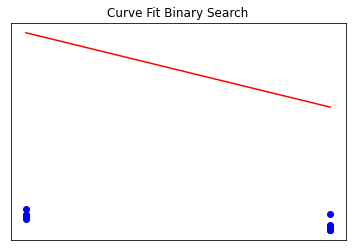

In [92]:
test_loc_b_array = np.array(test_loc_b)
timeTaken_test_b_array = np.array(timeTaken_test_b)
x_axis_test_b = (test_loc_b_array).reshape(-1, 1)
y_axis_test_b = (timeTaken_test_b_array).reshape(-1, 1)

regr_b = linear_model.LinearRegression()

regr_b.fit(x_axis_train_b, y_axis_train_b)

y_pred_b = regr_b.predict(x_axis_test_b)

print('Coefficients:', regr_b.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_axis_test_b, y_pred_b))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_axis_test_b, y_pred_b))

plt.scatter(x_axis_test_b, y_axis_test_b, color='blue')
plt.plot(x_axis_test_b, y_pred_b, color='red')

plt.xticks(())
plt.yticks(())
plt.title('Curve Fit Binary Search')
plt.show()
